# Исследование продаж компьютерных игр и выявление закономерностей

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо провести исследование и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.



## Изучение данных из файла

Импорт библиотек и основные настройки:

In [1]:
from matplotlib import pyplot as plt
from scipy import stats as st
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Чтение файла с данными, просмотр информации о датафрейме и вывод на экран 5 произвольных строк:

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
games.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E


Вывод числового описания столбцов:

In [3]:
games[['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']].describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Таблица содержит 11 столбцов, из которых 6 имеют вещественный и 5 - строковый тип данных. Общее количество данных 16715, а в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` данных меньше, значит в них есть пропуски. 

Названия столбцов содержат заглавные буквы, что является неудобным при проведении анализа, поэтому названия столбцов необходимо привести к нижнему регистру.

Столбец `Year_of_Release` содержит год выпуска игры, а имеет вещественный тип данных. Его нужно будет преобразовать в беззнаковый подтип целочисленного типа.

**Вывод по шагу 1**

Предварительный анализ данных показал, что перед проведением исследования необходимо обработать пропуски, привести названия столбцов к нижнему регистру, преобразовать типы данных.

## Подготовка данных

### Замена названий столбцов

Как видно из описания данных, названия столбцов достаточно информативны, но для удобства дальнейшего анализа их необходимо привести к нижнему регисту.

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Выведем количество пропусков по всем столбцам нашего датафрейма на экран:

In [5]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<br><br>
**Обработка пропусков по столбцам 'name' и 'genre'**

Столбцы `name` и `genre` содержит по 2 пропуска. Выведем на экран строки с отсутствующими значениями в столбце `name`:

In [6]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что в строках с пропущенным названием игры также пропущен и жанр. Так как определить название игры и жанр из имеющихся данных не представляется возможным, а объём таких данных по сравнению с общим объёмом пренебрежимо мал, удалим эти две строки.

In [7]:
games.dropna(subset = ['name'], inplace = True)
games = games.reset_index(drop=True)

<br><br>

**Обработка пропусков по столбцу 'year_of_release'**

Теперь перейдём к обработке пропусков в столбце `year_of_release`. Заполним пропуски в столбце с годом выпуска по совпадению названия игры. Для этого сгруппируем датасет по названию игры (столбцу `name`) и возьмём минимальное значение года выпуска, допуская, что в основном игры для разных платформ выходят одновременно.

In [8]:
games_names = games.groupby('name')['year_of_release'].min()

for i in games_names.index:
    games.loc[games['name'] == i,'year_of_release'] = games.loc[games['name'] == i,'year_of_release'].fillna(games_names[i])

print('Количество пропущенных значений столбца year_of_release после заполнения пропусков:', len(games[(games['year_of_release'].isna() == True)]))

Количество пропущенных значений столбца year_of_release после заполнения пропусков: 146


У нас всё ещё осталось 146 пропусков в столбце `year_of_release`, однако определить год выпуска игры по другим имеющимся данным мы не можем. Посмотрим, какую долю составляют строки с отсутствующим значением года в общем объёме данных.

In [9]:
print('Количество строк с пропусками в столбце year_of_release составляет {:.2%} от общего объёма данных.'.format(games['year_of_release'].isnull().sum() / len(games)))

Количество строк с пропусками в столбце year_of_release составляет 0.87% от общего объёма данных.


Доля таких строк невелика, всего менее 1%, поэтому их удаление не приведёт к сколь-либо заметному искажению результатов.

In [10]:
games.dropna(subset = ['year_of_release'], inplace = True)
games = games.reset_index(drop=True)

<br><br>

**Обработка пропусков по столбцу 'rating'**

Перейдём к заполнению отсутствующих значений столбца `rating`. Посмотрим сначала, какие значения он содержит:

In [11]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для понимания приведём здесь расшифровку буквенных обозначений возрастного рейтинга:

- EC («Early childhood») — для детей младшего возраста: игра подходит для детей от 3 лет;
- E («Everyone») — для всех: содержание вполне подходит для возрастной категории от 6 лет;
- E10+ («Everyone 10 and older») — для всех от 10 лет и старше;
- T («Teen») — Подросткам: игра подходит для лиц от 13 лет;
- K-A («Kids to Adults») — для детей и взрослых (в настоящее время не используется, т.к. в 1998 году был переименован в Е – для всех возрастов);
- M («Mature») — для взрослых: материалы игры не подходят для подростков младше 17 лет;
- AO («Adults Only 18+») — только для взрослых: содержание игры только для взрослых старше 18 лет;
- RP («Rating Pending») — рейтинг ожидается.

Будем считать, что если возрастной рейтинг игры не указан, значит, он ещё не присвоен. Заполним пропуски значением "рейтинг ожидается", а именно 'RP':

In [12]:
games['rating'] = games['rating'].fillna('RP')

<br><br>

**Обработка пропусков по столбцу 'critic_score'**

Выведем все уникальные значения в этом столбце:

In [13]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Пропуски в `critic_score` могли появится потому, что для каких-то игр просто могло не набраться достаточно оценок, чтобы значение было присвоено.

На этапе знакомства с данными мы увидели, что минимальное значение оценки критиков в наших данных - это 13, а максимальное - 98, а нулевой оценки просто не существует. И это ожидаемо - если критик оценивает игру, он должен поставить некоторое отличное от нуля значение, хотя бы самое минимальное. Поэтому пропуски логичнее всего заполнить `0` - это будет служить маркером отсутствия оценки критиков.

Также следует заметить, что столбец `critic_score` содержит только положительные целые числа - это наблюдение понадобиться нам в шаге преобразования типа данных. 

In [14]:
games['critic_score'] = games['critic_score'].fillna(0)

<br><br>

**Обработка пропусков по столбцу 'user_score'**

По аналогии со столбцом `critic_score` воспользуемся методом `.unique()` для просмотра содержания столбца `user_score`:

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Причина появления пропусков в стобце с оценкой пользователей может быть аналогична ситуации с пропусками в столбце `critic_score`.

Кроме пропусков этот столбец содержит вещественные числа от 0 до 10 с одним знаком после запятой, а также нечисловое значение 'tbd'. Это сокращение расшифровывается как 'to be determined', что означает "определение следует", т.е. значение в скором времени будет определено. По сути, пропуски и значение 'tbd' для нас обозначают одно и то же - оценка пользователей неопределена. Но воспользоваться решением для столбца `critic_score` (заполнить пропуски нулями) мы не можем, поскольку пользователи нулевую оценку поставить могут.

В связи с этим выберем маркером для заполнения пропусков отрицательное число `-1`. Также перезапишем значения 'tbd' в столбце `user_score` на этот же маркер:

In [16]:
games['user_score'] = games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

Теперь столбец `user_score` содержит только числовые значения.

<br><br>

Проверим, все ли пропуски заполнены:

In [17]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Вывод**

Пропусков в данных больше нет. В процессе обработки было принято решение об удалении 148 строк, но так как это составляет менее 1% общего объёма данных, такая мера не повлияет на результаты дальнейшего исследования. Также все значения в столбце `user_score` были приведены к числовому представлению, а также было выяснено, что данные в столбце `critic_score` имеют целые положительные значения.

### Преобразование типов данных

На этапе знакомства с таблицей и процессе заполнения отсутствующих значений мы увидели, что некоторые столбцы имеют неудобные, а порой и некорректные для исследования. Заменим типы данных на более удобные и логичные.

- столбцы `year_of_release` и `critic_score` содержат целочисленные значения, а тип данных имеет вещественный (float64). Переведём эти столбцы в формат беззнаковый целочисленный тип uint16 и uint8 соответственно методом `.astype()`;
- столбец `user_score` содержит числовые значения, поэтому переведём его из строкового (object) в вещественный тип (float64).

In [18]:
games['year_of_release'] = games['year_of_release'].astype('uint16')
games['critic_score'] = games['critic_score'].astype('uint8')
games['user_score'] = games['user_score'].astype('float64')

print('Типы данных в таблице calls изменены, результат:')
print()
games.info()

Типы данных в таблице calls изменены, результат:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null uint16
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null uint8
user_score         16567 non-null float64
rating             16567 non-null object
dtypes: float64(5), object(4), uint16(1), uint8(1)
memory usage: 1.2+ MB


**Вывод**

При преобразовании типы данных приведены к более корректным, а потребление памяти сократилось на 15%.

### Проверка на дубликаты

Проверим данные на наличие дубликатов:

In [19]:
print('Количество дубликатов в датафрейме:', games.duplicated().sum())

Количество дубликатов в датафрейме: 0


**Вывод**

Дубликаты в датасете не обнаружены.

### Подсчёт суммарных продаж

Посчитаем суммарные продажи во всех регионах и запишем результат в отдельный столбец `total_sales`. Для этого просуммируем числа в столбцах `na_sales`, `eu_sales`, `jp_sales` и `other_sales`. Выведем на экран 5 случайных строк, чтобы визуально увидеть результат.

In [85]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.sample(n=5, random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12137,The Guided Fate Paradox,PS3,2013,Role-Playing,0.00,0.00,0.06,0.00,74,7.8,T,0.06
14701,Putty Squad,PSV,2013,Platform,0.01,0.01,0.00,0.01,0,8.2,E10+,0.03
272,Daxter,PSP,2006,Platform,2.45,1.01,0.00,0.75,85,8.7,E10+,4.21
7153,Ms. Pac-Man: Maze Madness,N64,2000,Puzzle,0.18,0.04,0.00,0.00,0,-1.0,RP,0.22
9369,Contra III: The Alien Wars,SNES,1992,Shooter,0.00,0.00,0.13,0.00,0,-1.0,RP,0.13


**Вывод по шагу 2**

Ликвидировав пропуски, заменив типы данных и добавив новый столбец с суммарными продажами (в миллионах проданных копий) в датасей, мы подготовили данные для дальнейшего исследования.

## Исследовательский анализ данных

### Анализ данных по играм за все годы

**Количество игр в разные годы**

Сгруппируем данные по году выпуска и посчитаем, сколько игр выпускалось в разные годы. Сохраним результат в отдельный датафрейм `games_per_year`:

In [21]:
games_per_year = games.groupby(['year_of_release']).agg({'total_sales': ['count']}).reset_index()
games_per_year.columns = list(games_per_year.columns)
games_per_year.columns

Index([('year_of_release', ''), ('total_sales', 'count')], dtype='object')

Переименуем столбцы в `games_per_year` и выведем на экран новые наименования столбцов, чтобы увидеть результат:

In [22]:
games_per_year.rename(columns={('year_of_release', ''): 'year_of_release', ('total_sales', 'count'): 'games_quantity'}, inplace=True)
games_per_year.columns

Index(['year_of_release', 'games_quantity'], dtype='object')

Визуализируем данные получившегося датафрейма: построим график, в котором по оси X будут отложены годы `year_of_release`, а по оси Y - количество выпущенных игр `games_quantity`.

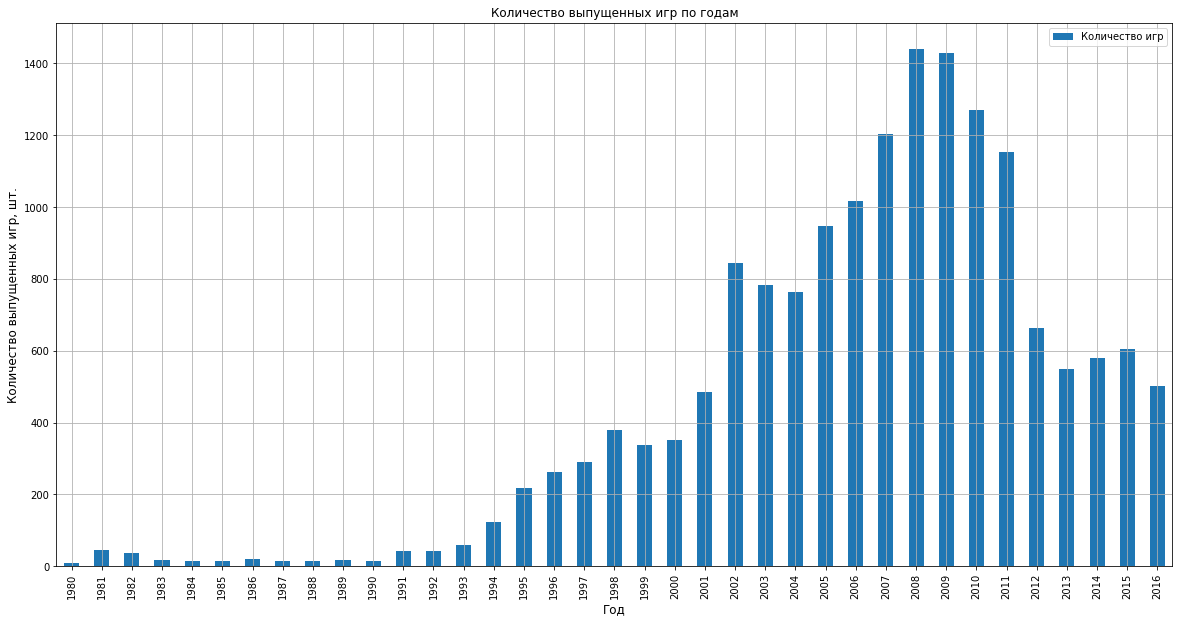

In [23]:
ax = games_per_year.plot(x='year_of_release', y='games_quantity', kind='bar', figsize=(20, 10), grid=True, label='Количество игр')
ax.set_title('Количество выпущенных игр по годам')
ax.set_xlabel('Год', fontsize = 12)
ax.set_ylabel('Количество выпущенных игр, шт.', fontsize = 12)
plt.show()

В период с 1980 по 1993 выпускалось очень маленькое количество игр. Это связано с тем, что индустрия компьютерных игр только начала зарождаться, и игровые приставки были у малого числа людей. После, начиная с 1994 года наблюдался заметный рост, до 1998 года. В 1999-2000 годах количество выпущенных игр немного снизилось, но уже в 2001 оно превысило уровень 1998 года. В 2002 году видно резкое почти двукратное увеличение. В течение 2003-2004 годов количество игр оставалось примерно одинаковым (на уровне 800 игр в год), а затем, начиная с 2005 по 2008 год оно динамично росло. Максимума выпуск компьютерных игр достиг в 2008 и 2009 годах. В 2010 и 2011 годах число игр равномерно снижалось, пока в 2012 не упало практически в 2 раза. Начиная с 2013 года количество игр остаётся примерно одинаковым (на уровне 600 игр в год).

Очевидно, что с течением времени рынок компьютерных игр менялся, одни платформы устаревали, другие появлялись, увеличивалась доступность игр. Количество выпущенный за годы игр росло и снижалось. Данные за все годы с 1980 по 2016 в рамках нашего исследования нам не важны, так как мы планируем продажи и рекламные компании на 2017 год. Поэтому сразу выделим период актуальности для проведения анализа - это последние 5 лет - с 2012 по 2016 год включительно.

<br>

**Суммарные продажи по платформам и годам**

Изучим, как менялись продажи по платформам. Для этого сгруппируем данные по платформе и году выпуска, и посчитаем для каждого суммарные продажи. Результат сохраним в новый датасет `games_per_year_platform`:

In [24]:
games_per_year_platform = games.groupby(['platform', 'year_of_release']).agg({'total_sales': ['sum']}).reset_index()
games_per_year_platform.columns = list(games_per_year_platform.columns)
games_per_year_platform.columns

Index([('platform', ''), ('year_of_release', ''), ('total_sales', 'sum')], dtype='object')

Переименуем столбцы для более удобного представления данных, и выведем новые названия столбцов:

In [25]:
games_per_year_platform.rename(columns={('platform', ''): 'platform', ('year_of_release', ''): 'year_of_release', ('total_sales', 'sum'): 'total_sales'}, inplace=True)
games_per_year_platform.columns

Index(['platform', 'year_of_release', 'total_sales'], dtype='object')

Выведем на экран суммарные продажи по платформам с помощью метода `.pivot_table()`, и определим платформы с наибольшим количеством суммарных продаж. Для этого отсортируем таблицу в порядке убывания по столбцу `total_sales`:

In [26]:
games_per_year_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Из сводной таблицы выше видно, что платформы с наибольшими суммарными продажами находятся в первых шести строках (продажи игр для платформы из седьмой строки PS4 уже в 2 раза меньше, чем из шестой строки PS). Посмотрим, как менялись продажи для шести самых популярных платформ в зависимости от года. Построим распределение продаж по годам:

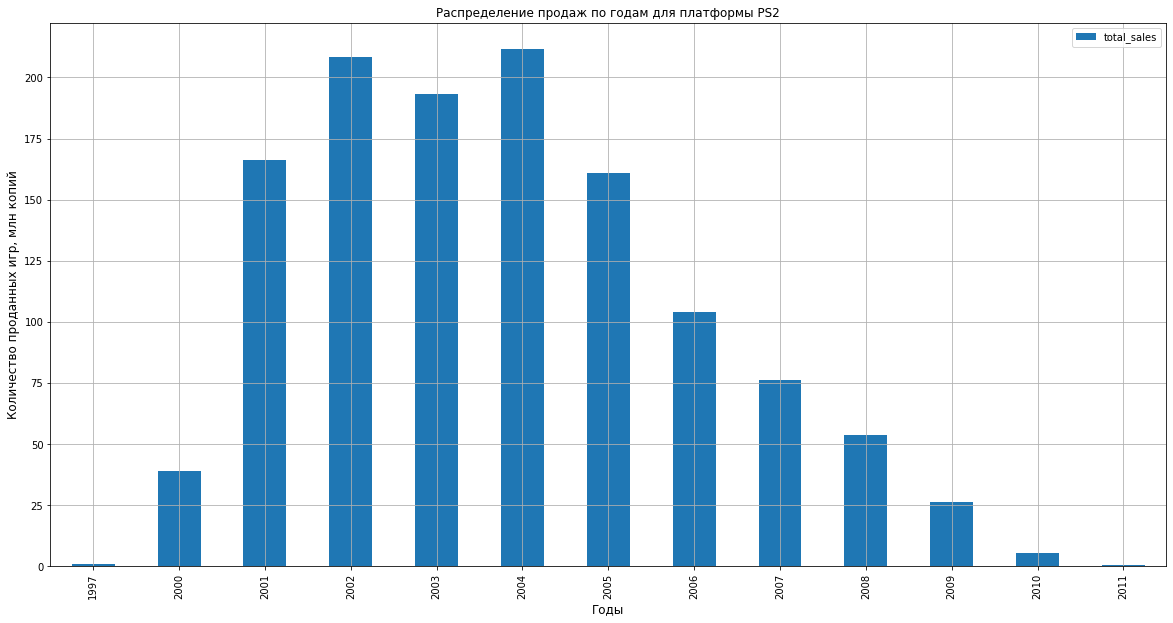

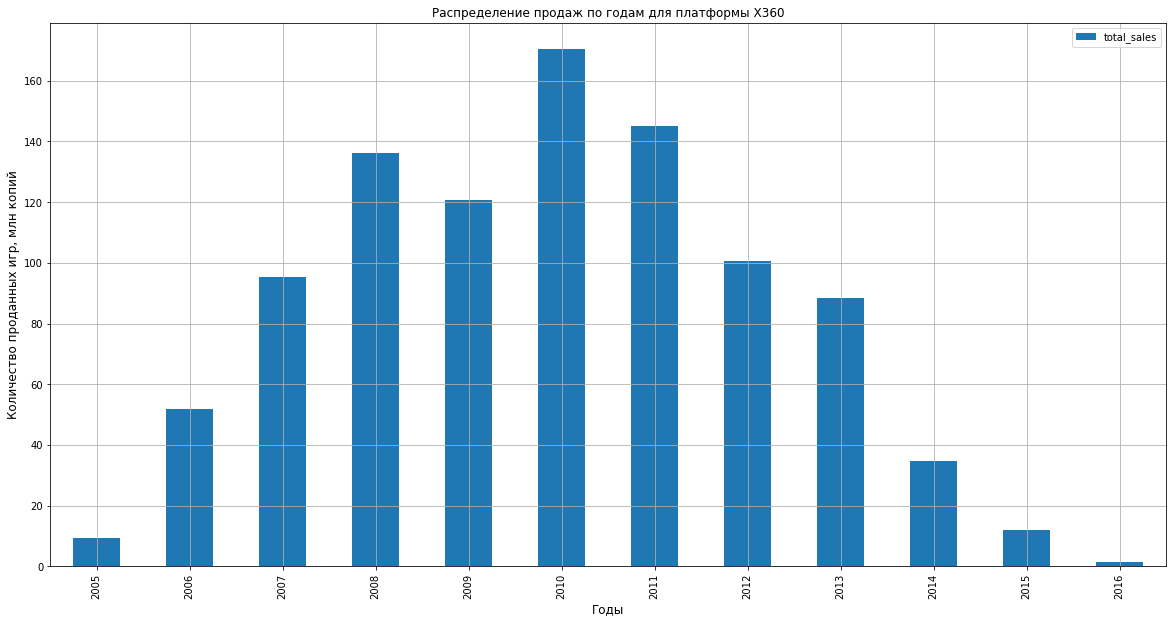

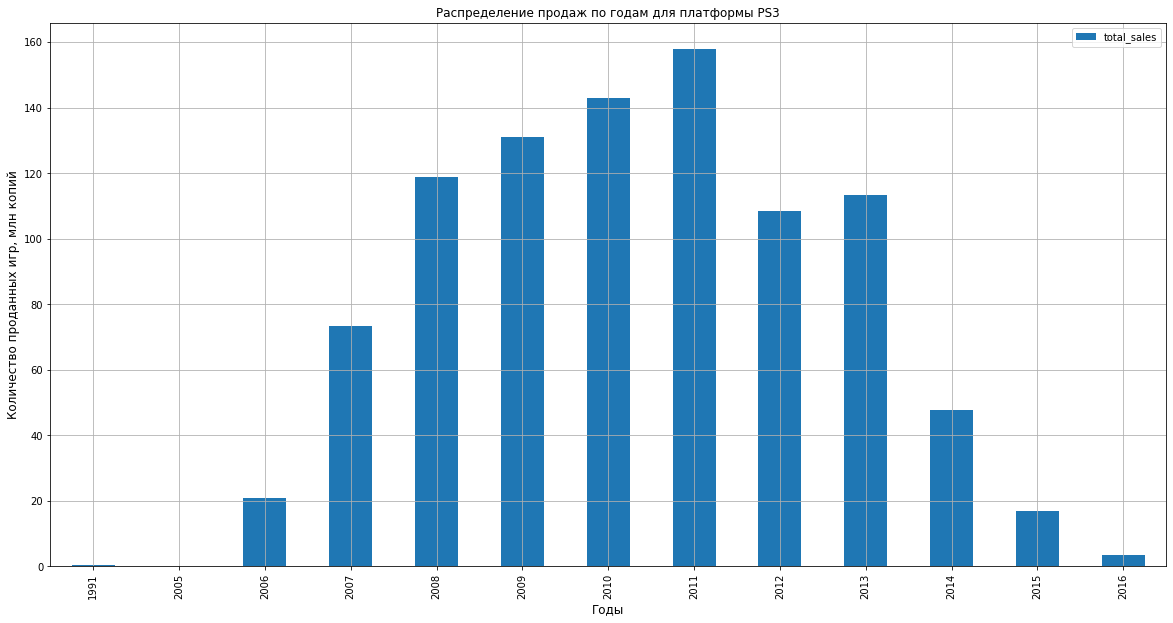

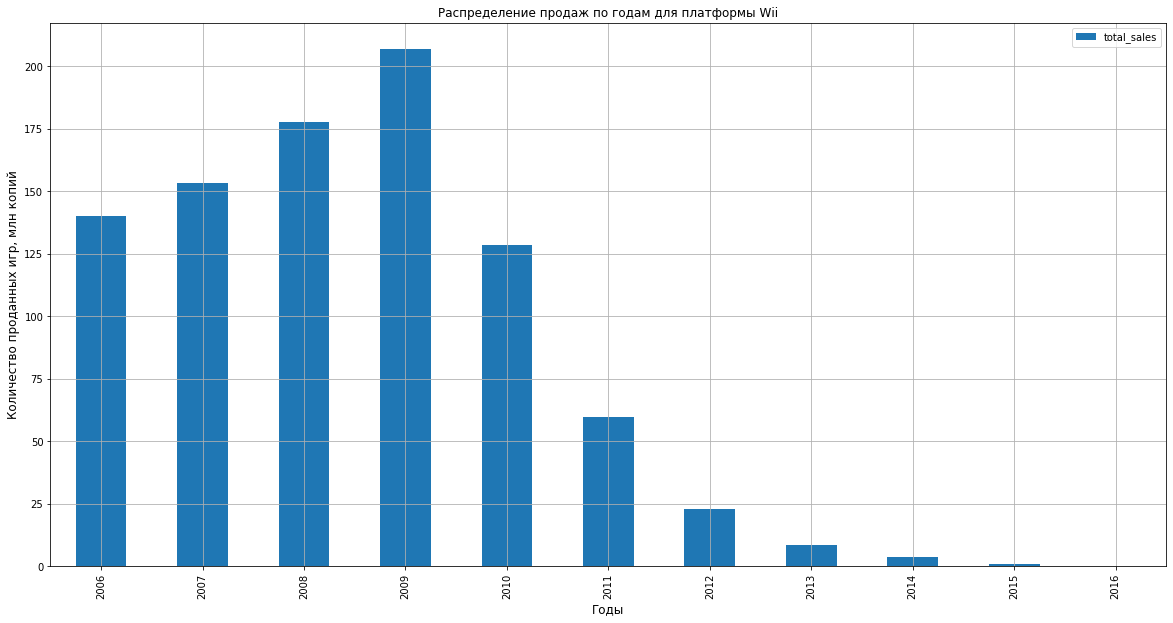

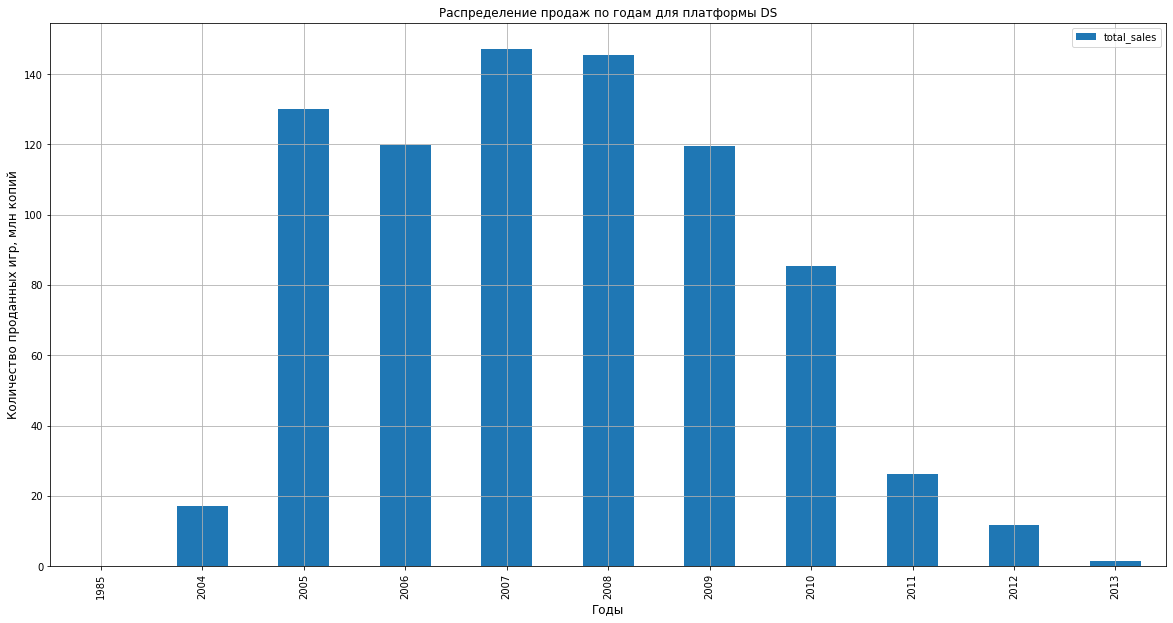

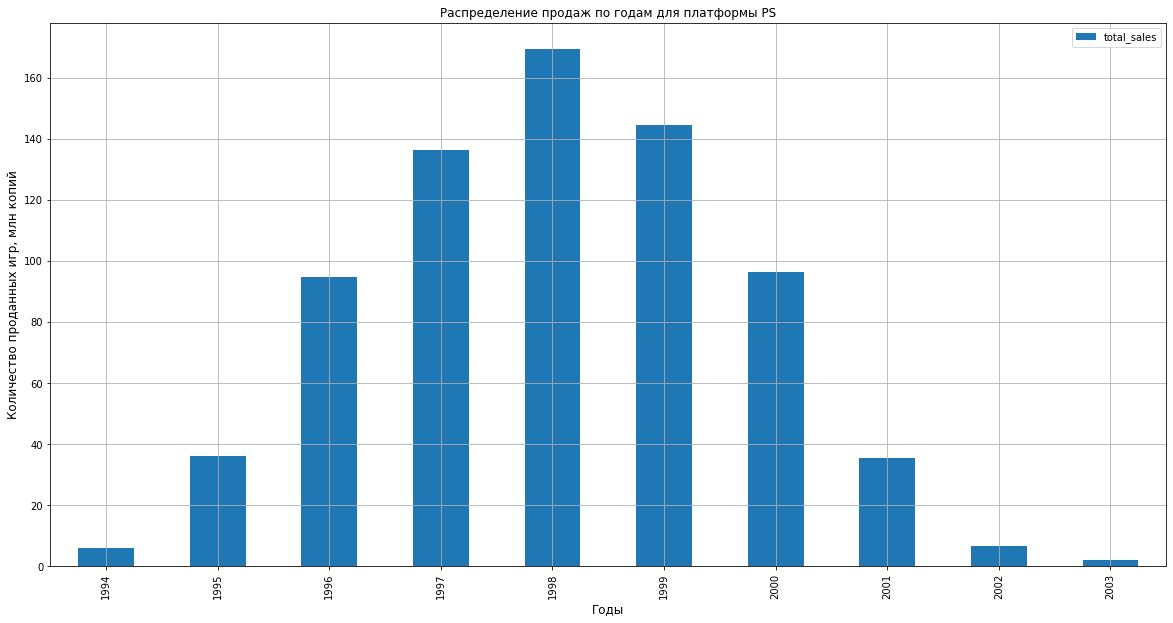

In [27]:
platform_names = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in platform_names:
    ax = games_per_year_platform[games_per_year_platform['platform'] == i].plot(x='year_of_release', y='total_sales', kind='bar', figsize=(20, 10), grid=True)
    ax.set_title('Распределение продаж по годам для платформы ' + i)
    ax.set_xlabel('Годы', fontsize = 12)
    ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
    plt.show()

Из диаграмм видно, что "срок жизни" платформы в среднем составляет 10 лет - именно в течение этого срока на графиках наблюдается распределения значений. За такой срок появляются и исчезают новые платформы. Также видим дополнительное подтверждение правильности сделанного в ранее выбора актуального периода в 5 лет - в таких длинах интервалов наблюдаются основные тенденции: максимумы, периоды роста и спада.

**Вывод**

Изучив, как менялось количество выпускаемых игр в разные годы и проанализировав графики распределения суммарных продаж по годам для шести самых популярных платформ, мы определили, что для построения прогноза на 2017 год нам необходимы данные только за 5 последних лет, а не за весь период. Таким образом, период актуальности - это промежуток с 2012 по 2016 год включительно.

### Анализ данных по играм за актуальный период

**Выделение потенциально прибыльных платформ**

Исключим из датафрейма `games_per_year_platform` данные за 1980-2011 годы, чтобы исследовать только данные за актуальный период, запишем в таблицу `games_per_platform_actual`:

In [28]:
games_per_platform_actual = games_per_year_platform[games_per_year_platform['year_of_release'] > 2011].copy()

Чтобы увидеть, какие платформы лидируют по продажам, выведем сводную таблицу, которая отражает суммарные продажи игр для каждой платформы по годам:

In [29]:
games_per_platform_actual.pivot_table(index=['platform'], columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,56.57,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.45,13.01,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.95,3.38,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Из таблицы видно, что наибольший объём продаж за 2016 год пришёлся на игры для платформы PS4, второе место занимает XOne, на третьем - 3DS. Однако в сравнении с 2015 годом по всем платформам наблюдается спад продаж. Историчесткий максимум за 5 лет с 2012 по 2016 год принадлежит платформе PS4 и равен 118,9 млн копий (2015).

Выведем на экран все платформы, которые остались у нас в датафрейме после актуализации годов. Этот список понадобится нам при построении графиков.

In [30]:
games_per_platform_actual['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'], dtype=object)

Построим графики зависимости количества проданных копий игр в зависимости от года по каждой платформе, чтобы визуально увидеть тенденции роста или падения:

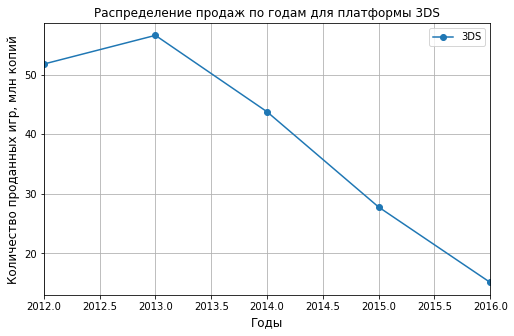

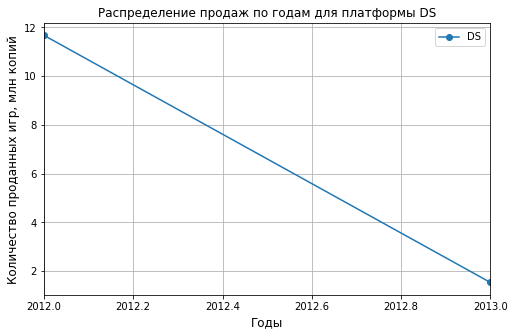

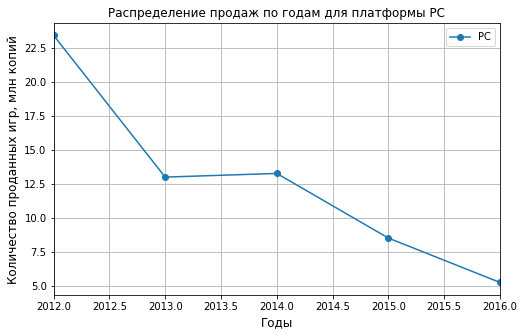

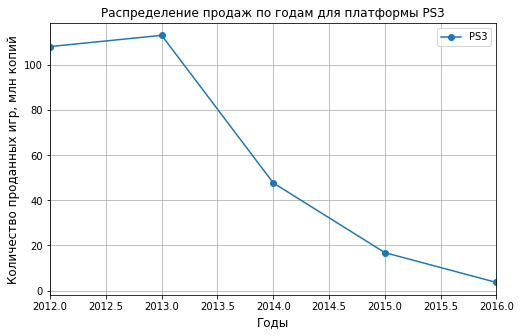

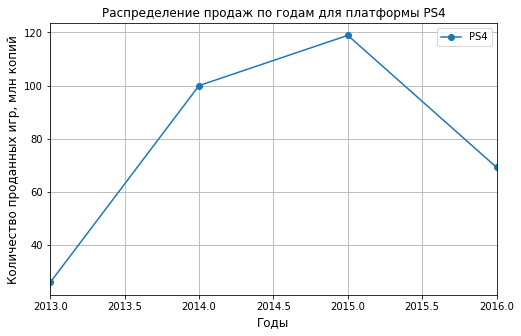

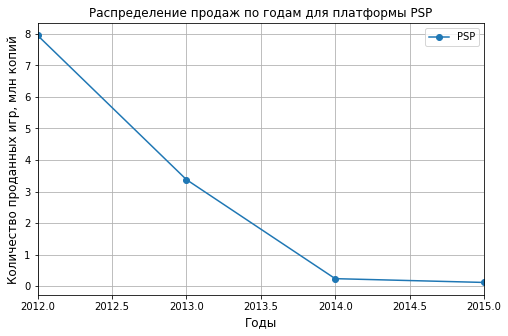

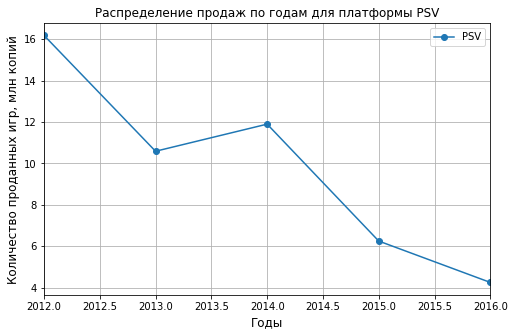

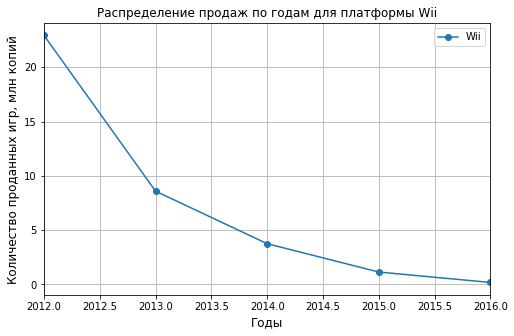

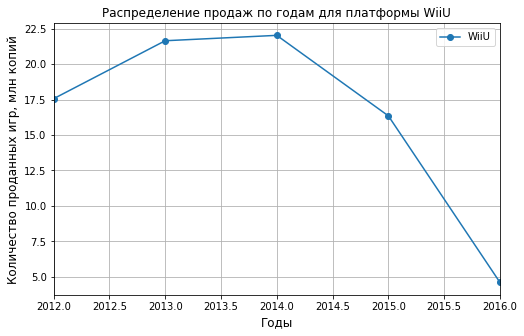

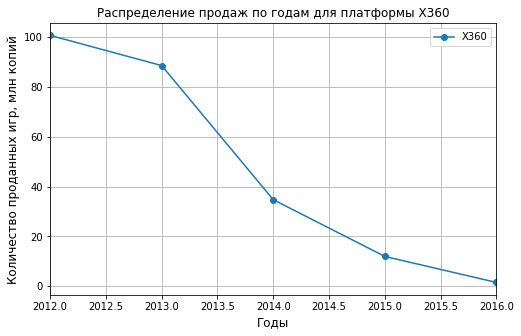

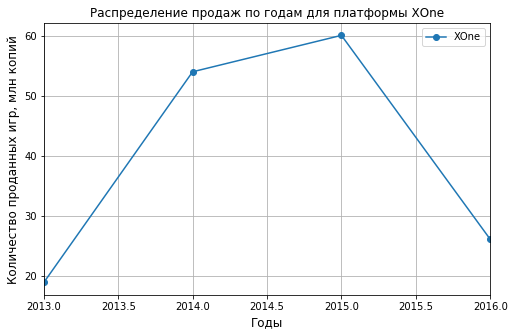

In [31]:
platforms_list = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU','X360', 'XOne']

for n in platforms_list:
    ax = games_per_platform_actual[games_per_platform_actual['platform'] == n].plot(x = 'year_of_release', y = 'total_sales', label=n, style='o-', figsize=(8, 5), grid=True)
    ax.set_title('Распределение продаж по годам для платформы ' + n)
    ax.set_xlabel('Годы', fontsize = 12)
    ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
    plt.show()

Графики показывают, что для всех платформ, за исключением XOne, PS4, WiiU, имеет место практически перманентый спад продаж за рассматриваемый период. 

Рассмотрим подробнее графики для трёх вышеуказанных платформ-исключений:
- для платформы WiiU наблюдается рост с 2012 по 2014 годы, а в период с 2014 по 2016 виден довольно резкий спад - в 2016 году продажи были примерно в 4 раза ниже, чем в 2015;
- продажи игр для платформы XOne также сильно просели в последний год - видно резкое уменьшение приблизительно в 3 раза в 2016 году по сравнению с 2015, несмотря на то, что в предыдущие периоды продажи росли;
- самое маленькое снижение в периоде 2015-2016 гг. наблюдается по продажам для платформы PS4 - в 2 раза. При этом PS4 является лидером по количеству проданных копий на протяжении трёх последних лет.

Построим диаграммы размаха по суммарным продажам игр в разбивке по платформам:

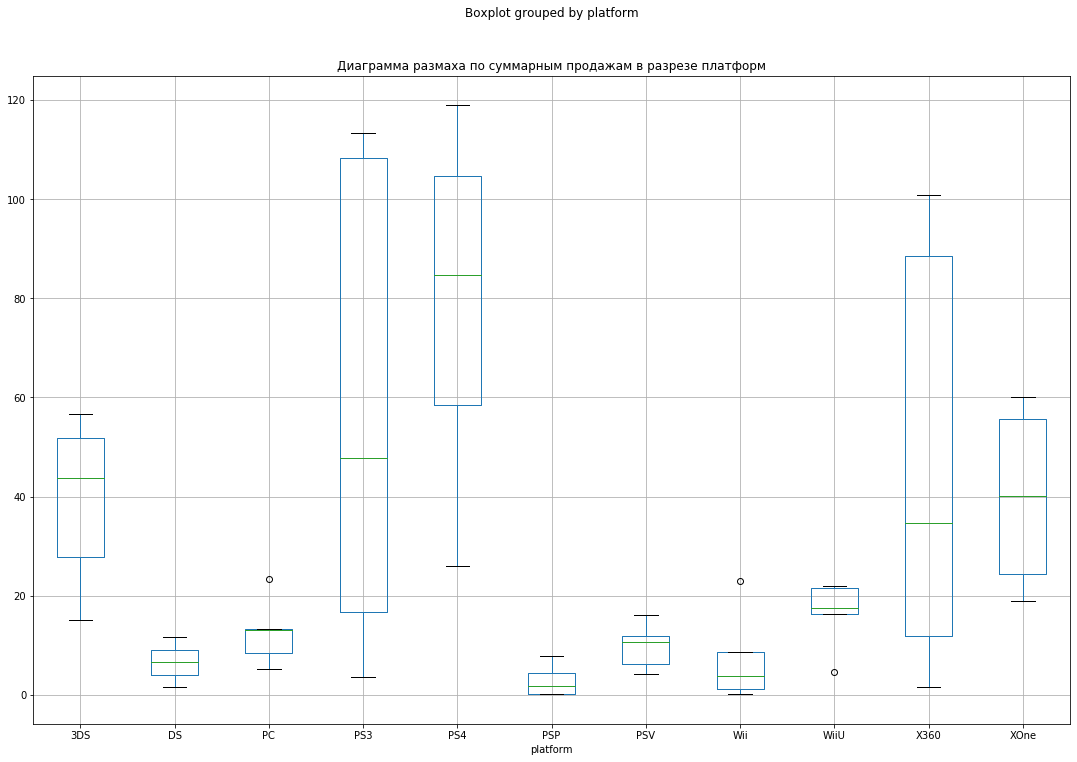

In [32]:
games_per_platform_actual.boxplot('total_sales', by = 'platform', figsize=(18, 12))
plt.title('Диаграмма размаха по суммарным продажам в разрезе платформ')
plt.show()

На этом графике хорошо видны размахи для платформ с большим разбросом значений. Однако для платформ с маленьким разбросом такие диаграммы размаха получились неинформативными. Поэтому построим ещё один график, установив параметр `ylim` в интервале от `-1` до `23`, чтобы рассмотреть другие диаграммы.

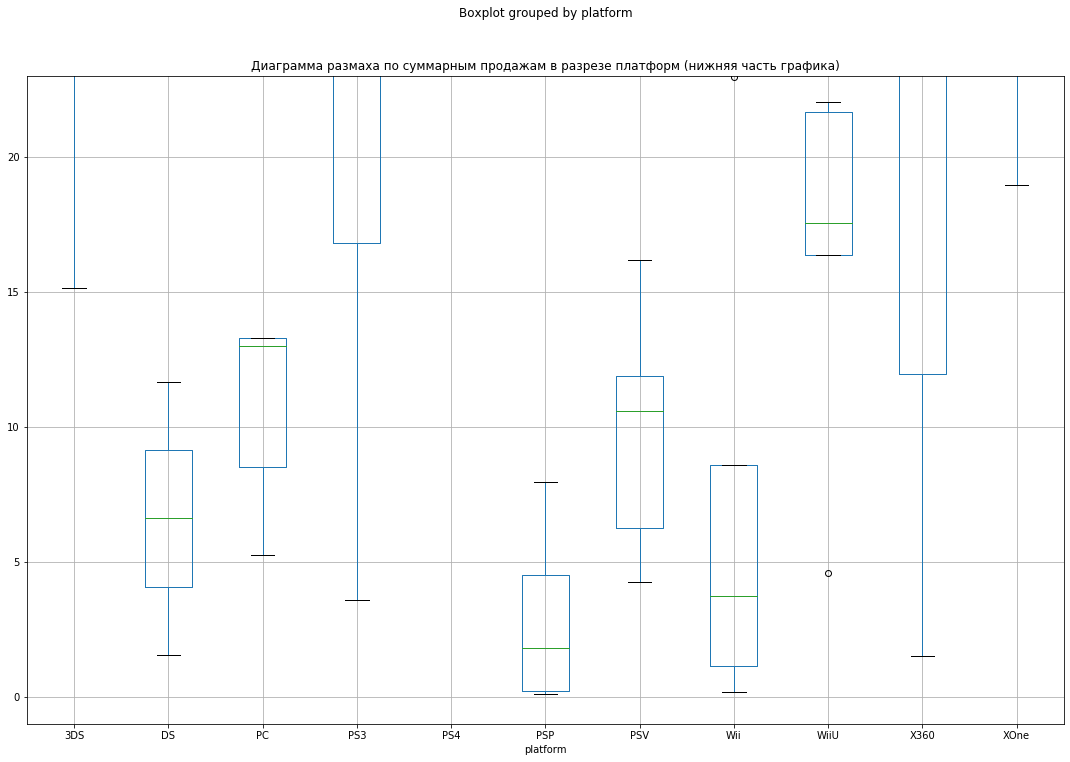

In [84]:
games_per_platform_actual.boxplot('total_sales', by = 'platform', figsize=(18, 12))
plt.title('Диаграмма размаха по суммарным продажам в разрезе платформ (нижняя часть графика)')
plt.ylim(-1, 23)
plt.show()

Самые высокие медианные продажи имеют следующие пять платформ: 3DS, PS3, PS4, X360, XOne. Опишем их боксплоты:

- Самый большой размах имеют данные продаж по платформе PS3. Это объясняется тем, что игры для этой платформы хорошо продавались в период до 2013 года, а потом пошло резкое снижение из-за выпуска платформы нового поколения PS4, поэтому к 2016 году продажи снизились в десятки раз.
- Также большой размах наблюдается по платформе X360. Эта платформа долгое время оставалась одной из самых популярных, но в апреле 2016 производитель заявил о прекращении производства. В следствие этого продажи игр для этой платформы к 2016 году снизились до отметки 1,52 млн копий, тогда как в 2012 году уровень продаж составлял 100,72 млн копий.
- Примерно одинаковый размах имеют величины продаж по платформам 3DS и XOne. Медианные значения находятся также примерно на одном уровне. Однако разница всё же есть. XOne - более новая игровая платформа, она вышла в 2013 году, на тот момент платформа 3DS уже существовала и достигла пика продаж предназначенных для неё игр, после чего продажи непрерывно снижались. Для XOne пик пришёлся на 2015 год, и хотя в 2016 году произошло снижение, всё же абсолютные продажи по XOne в 2016 году ощутимо больше, чем по 3DS.
- Самое высокое значение медианы, первого и третьего квартиля имеет диаграмма по платформе PS4. Эта платформа вышла в конце 2013 года и на конец 2016 года продажи игр для неё имеют наибольшие значения.

Из вышесказанного следует, что можно выделить две потенциально прибыльных платформы - PS4 и XOne.

<br>

**Влияние отзывов критиков и пользователей на продажи**

Посмотрим, как влияют отзывы пользователей и критиков на продажи игр внутри платформы PS4 за актуальный период. Сделаем соответствующий срез данных. Условие для среза будет одно: `platform == "PS4"`, а актуальность временного промежутка получится сама собой, так как в 2012 году и ранее эта платформа ещё не существовала.

In [33]:
games_ps4 = games.query('platform == "PS4"')

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков `critic_score` и продажами `total_sales`. Исключим из выборки игры с отсутствующим значением оценки критиков.

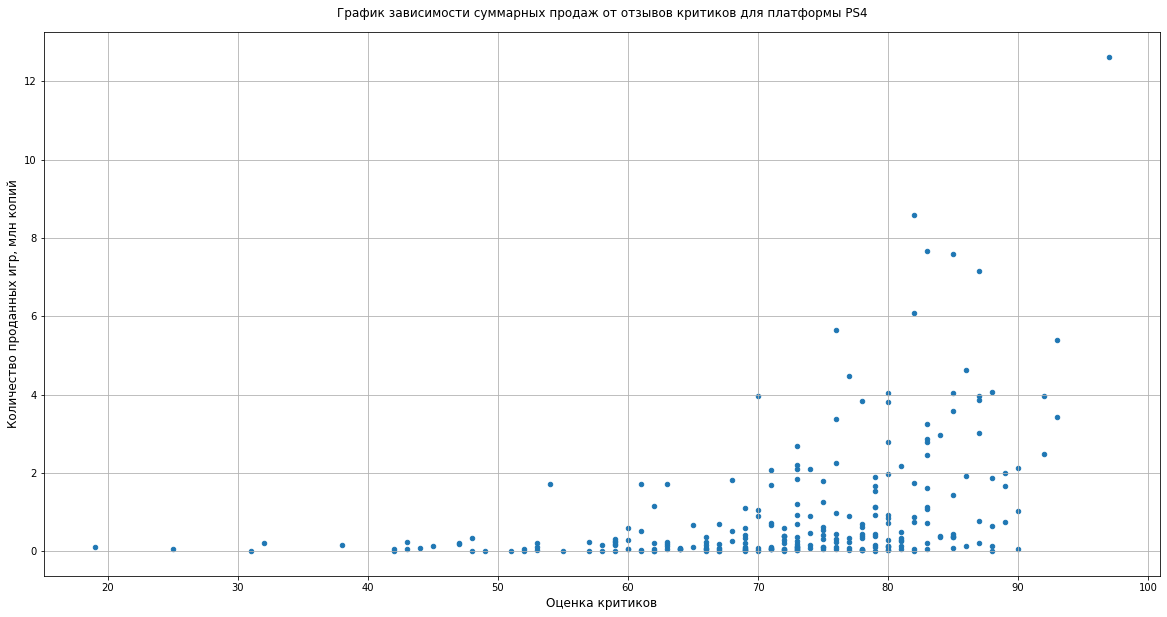

In [34]:
ax = games_ps4[games_ps4['critic_score'] != 0].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(20, 10), alpha=1, grid=True)
ax.set_title('График зависимости суммарных продаж от отзывов критиков для платформы PS4', pad=15)
ax.set_xlabel('Оценка критиков', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

In [35]:
print('Корреляция между оценкой критиков и продажами для платформы PS4:', games_ps4[games_ps4['critic_score'] != 0]['critic_score'].corr(games_ps4[games_ps4['critic_score'] != 0]['total_sales']))

Корреляция между оценкой критиков и продажами для платформы PS4: 0.40656790206178095


Точка максимальных продаж соответствует максимальной оценке критиков. В целом самые высокие продажи наблюдаются там, где оценка больше 70. Но прямой зависимости нет - видно большое количество точек около нулевых продаж, несмотря на высокие оценки. Корреляция также показывает наличие положительной, но не слишком сильной связи. Очевидно, что на продажи также влияют и другие факторы. 

Аналогично исследуем зависимость между оценками пользователей `user_score` и продажами, исключим отсутствующие оценки.

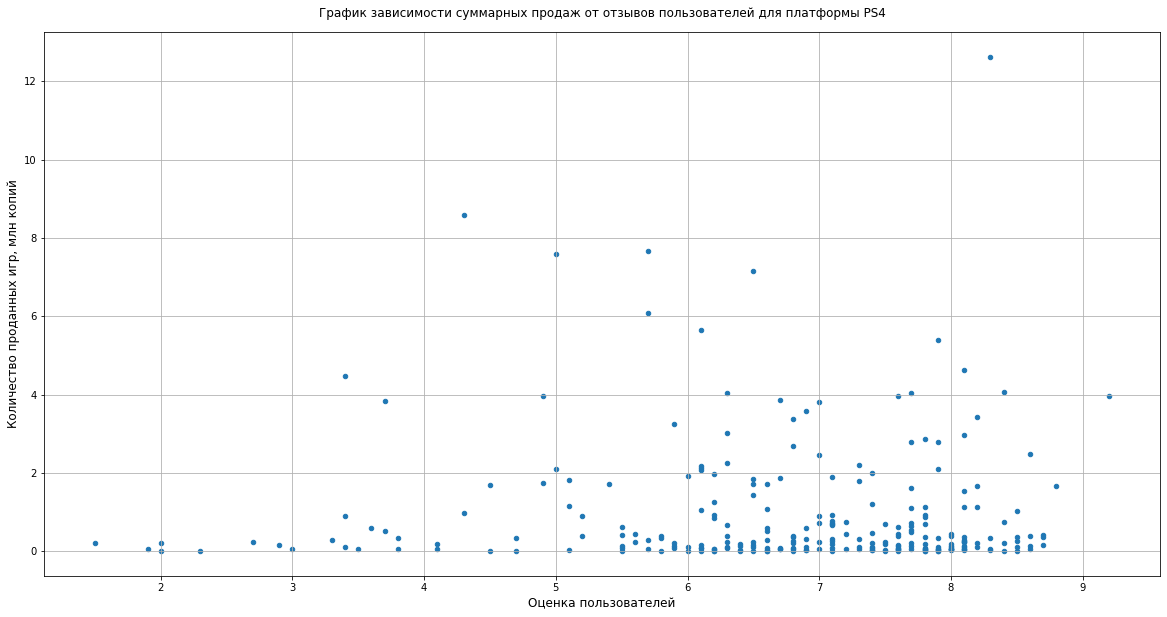

In [36]:
ax = games_ps4[games_ps4['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', figsize=(20, 10), alpha=1, grid=True)
ax.set_title('График зависимости суммарных продаж от отзывов пользователей для платформы PS4', pad=15)
ax.set_xlabel('Оценка пользователей', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

In [37]:
print('Корреляция между оценкой пользователей и продажами для платформы PS4:', games_ps4[games_ps4['user_score'] != -1]['user_score'].corr(games_ps4[games_ps4['user_score'] != -1]['total_sales']))

Корреляция между оценкой пользователей и продажами для платформы PS4: -0.031957110204556376


Тут получается очень интересная закономерность! Хотя максимум продаж соответствует довольно высокой оценке - около 8.3, второе по величине значение продаж соответствует оценке ниже среднего (около 4.3), и в общем высокие продажи наблюдаются в интервале средних оценок - от 4 до 7. А в интервале с более высокими оценками (больше 5.5) видим обилие значений довольно маленьких продаж. Отрицательная корреляция сигнализирует о тенденции к обратной зависимости, однако близкое к нулю абсолютное значение этого параметра обозначает фактическое отсутствие зависимости между величиной продаж и оценкой пользователей.

Такой вывод показывает, что пользователи при принятии решения о покупке игры гораздо больше доверяют обзорам и оценкам критиков, а оценку пользователей почти не принимают во внимание, считая её слишком субъективной.

Не нужно забывать, что наши выводы справедливы лишь для одной платформы - PS4. Поэтому теперь исследуем влияние оценок на продажи по всем остальным платформам (исключая PS4) в целом за актуальный период. Создадим соответствующий срез:

In [38]:
games_other_platforms = games.query('platform != "PS4" and year_of_release > 2011')

Аналогично построим диаграммы рассеяния и посчитаем корреляцию между оценками критиков и пользователей и продажами `total_sales`. Исключим из выборки игры с отсутствующим значением оценок.

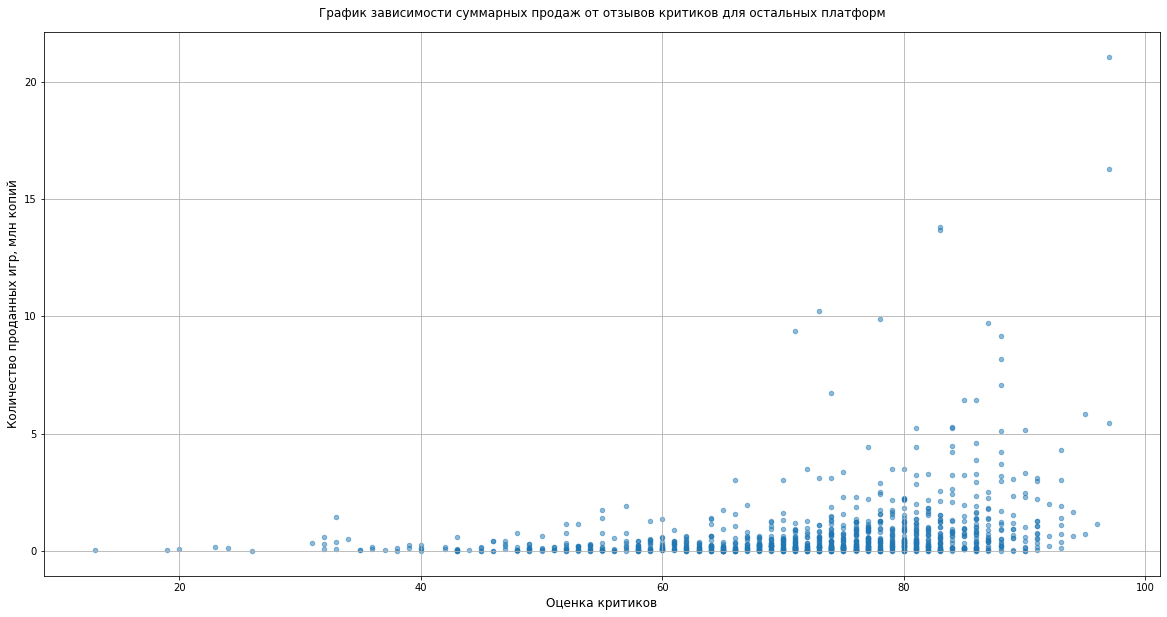

In [39]:
ax = games_other_platforms[games_other_platforms['critic_score'] != 0].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(20, 10), alpha=0.5, grid=True)
ax.set_title('График зависимости суммарных продаж от отзывов критиков для остальных платформ', pad=15)
ax.set_xlabel('Оценка критиков', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

In [40]:
print('Корреляция между оценкой критиков и продажами для остальных платформ:', games_other_platforms[games_other_platforms['critic_score'] != 0]['critic_score'].corr(games_other_platforms[games_other_platforms['critic_score'] != 0]['total_sales']))

Корреляция между оценкой критиков и продажами для остальных платформ: 0.2845740177855176


Общая картина зависимости продаж от оценки критиков для остальных платформ в целом близка к картине аналогичной зависимости для платформы PS4. Самые высокие продажи наблюдаются также для оценок, превышающих 70 баллов. Однако по сравнению с платформой PS4, другие платформы имеют более слабую зависимость от оценок - на это указывает как величина корреляции, так и б**о**льшее количество низких продаж в областях с высокими оценками.

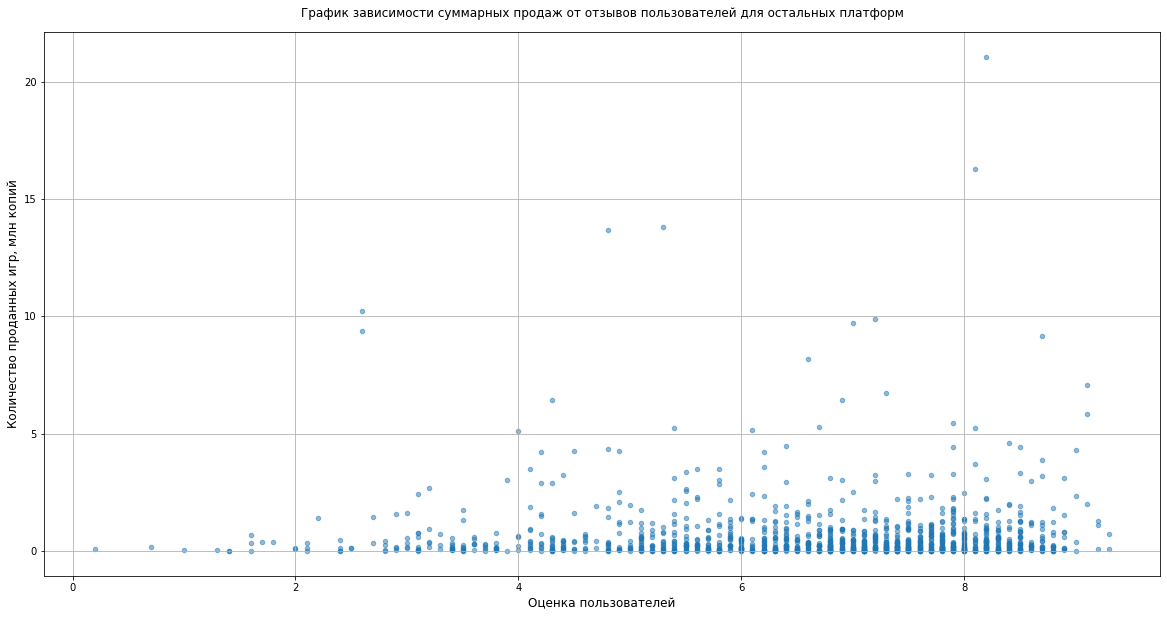

In [41]:
ax = games_other_platforms[games_other_platforms['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', figsize=(20, 10), alpha=0.5, grid=True)
ax.set_title('График зависимости суммарных продаж от отзывов пользователей для остальных платформ', pad=15)
ax.set_xlabel('Оценка пользователей', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

In [42]:
print('Корреляция между оценкой пользователей и продажами для платформы PS4:', games_other_platforms[games_other_platforms['user_score'] != -1]['user_score'].corr(games_other_platforms[games_other_platforms['user_score'] != -1]['total_sales']))

Корреляция между оценкой пользователей и продажами для платформы PS4: 0.009703094920774518


На диаграмме видна большая плотность низких продаж в интервале с оценками от 5.5 до 8.5. Продаж более 5 млн копий в принципе мало, значения соответствующих им оценок варьируются в очень широком диапазоне от 2.6 до 8.3, хотя наибольшее количество превышающих 5 млн копий продаж лежит в интервале оценок больше 6 баллов. О наличии какой-либо зависимости говорить не приходится, что подтверждается практически нулевым значением корреляции.

<br>

**Анализ игровых жанров**

Посмотрим, как распределены игры по жанрам. Для этого сгруппируем датафрейм `games` по жанрам, посчитаем количество игр каждого жанра и общую сумму продаж по жанру. Данные возьмём за актуальный период.

In [43]:
games_per_genre = games[games['year_of_release'] > 2011].groupby(['genre']).agg({'total_sales': ['count', 'sum', 'mean', 'median']}).reset_index()
games_per_genre.columns = list(games_per_genre.columns)
games_per_genre.columns

Index([            ('genre', ''),  ('total_sales', 'count'),
          ('total_sales', 'sum'),   ('total_sales', 'mean'),
       ('total_sales', 'median')],
      dtype='object')

Переименование столбцов на более удобные названия:

In [44]:
games_per_genre.rename(columns={('genre', ''): 'genre', ('total_sales', 'count'): 'games_quantity', ('total_sales', 'sum'): 'total_sales', ('total_sales', 'mean'): 'mean_sales', ('total_sales', 'median'): 'median_sales'}, inplace=True)

Выведем на экран итоговую таблицу:

In [45]:
games_per_genre

,genre,games_quantity,total_sales,mean_sales,median_sales
0,Action,1041,446.41,0.428828,0.120
1,Adventure,302,29.43,0.097450,0.030
2,Fighting,109,44.49,0.408165,0.130
3,Misc,193,85.28,0.441865,0.120
4,Platform,85,61.00,0.717647,0.210
5,Puzzle,28,4.89,0.174643,0.045
6,Racing,115,53.50,0.465217,0.140
7,Role-Playing,370,192.80,0.521081,0.140
8,Shooter,237,304.75,1.285865,0.430
9,Simulation,80,35.12,0.439000,0.120


Построим графики распределения игр по жанрам и суммарных продаж по жанрам:

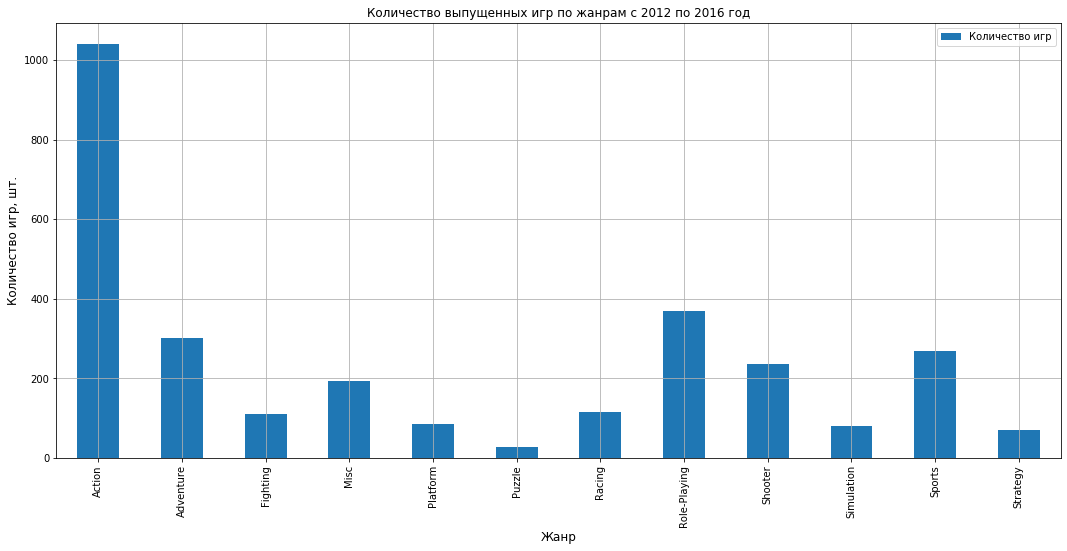

In [46]:
ax = games_per_genre.plot(x='genre', y='games_quantity', kind='bar', figsize=(18, 8), grid=True, label='Количество игр')
ax.set_title('Количество выпущенных игр по жанрам с 2012 по 2016 год')
ax.set_xlabel('Жанр', fontsize = 12)
ax.set_ylabel('Количество игр, шт.', fontsize = 12)
plt.show()

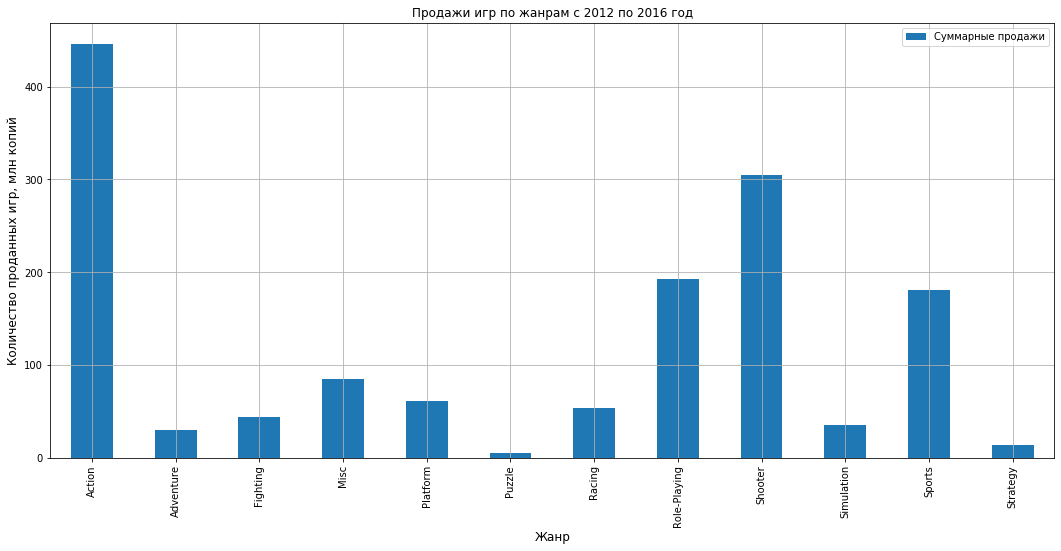

In [77]:
ax = games_per_genre.plot(x='genre', y='total_sales', kind='bar', figsize=(18, 8), grid=True, alpha=1, label='Суммарные продажи')
ax.set_title('Суммарные продажи игр по жанрам с 2012 по 2016 год')
ax.set_xlabel('Жанр', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

На отдельном графике построим распределения средних и медианных продаж:

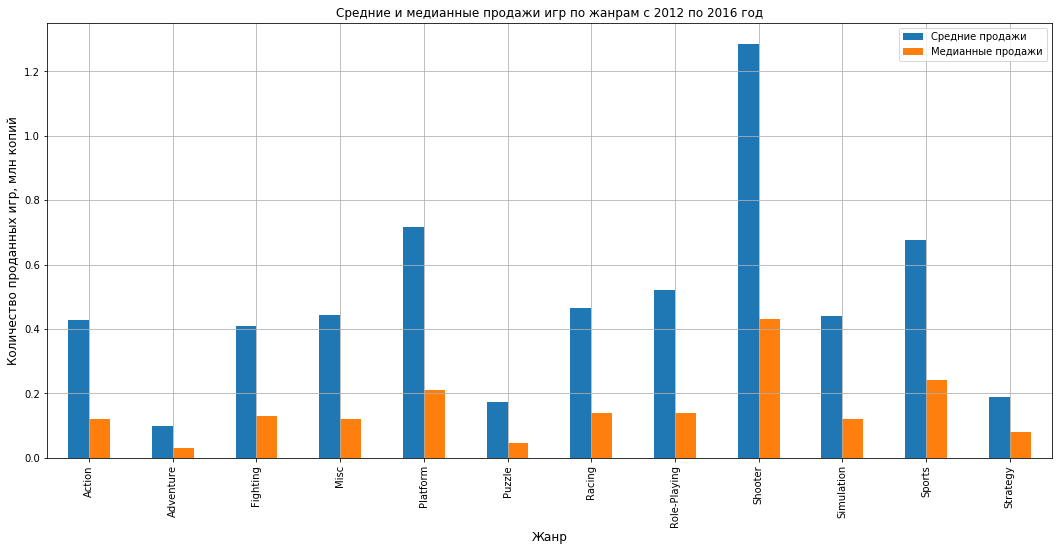

In [78]:
ax = games_per_genre.plot(x='genre', y=['mean_sales', 'median_sales'], kind='bar', figsize=(18, 8), grid=True, alpha=1, label=['Cредние продажи', 'Медианные продажи'])
ax.set_title('Средние и медианные продажи игр по жанрам с 2012 по 2016 год')
ax.set_xlabel('Жанр', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

Самое большое количество игр продаётся в жанре Action - одновременно он является и жанром с наибольшим количеством проданных копий. Однако у этого жанра не самое высокое значение средних и медианных продаж.

Второй по объёму продаж - это жанр Shooter, однако по количеству игр он занимает лишь пятое место. Зато у него самые высокие средние и медианные продажи.

Третьй самый продаваемый жанр - Role-Playing, который по количеству выпущенных игр занимает второе место. Средние и медианные продажи этого жанра также достаточно высокие.

Самые высокие показатели средних и медианных продаж, как уже говорилось выше, у жанра Shooter. За ним идут жанры Sports и Platform. На четвертом месте Role-Playing, на пятом - Racing.

Самые маленькие объёмы суммарных продаж у жанров Puzzle, Strategy и Adventure. Кроме того, их средние и медианы тоже самые низкие.

**Вывод**

Самыми прибыльными жанрами можно считать те, у которых высокие средние продажи. Как мы уже заметили, это Shooter, Sports, Platform, Role-Playing и Racing. Самые низкие cуммарные и средние продажи показывают жанры Puzzle, Strategy и Adventure.

**Вывод по шагу 3**

Изучив данные по играм за весь период, мы пришли к выводу, что для планирования будущего года нам необходимо проанализировать данные лишь за 5 последних лет. Выбран актуальный период с 2012 по 2016 годы включительно.

В процессе анализа данных за актуальный период нами были выделены две потенциально прибыльные платформы: PS4 и XOne. Оценив влияние оценок критиков и пользователей на продажи, мы пришли к следующим выводам: пользователи доверяют больше оценке авторитетных источников, т.е. критиков, а не пользователей. Наблюдается положительная корреляция между объёмом продаж и оценкой критиков при рассмотрении данных как по одной отдельно взятой игровой платформе, так и в целом по другим платформам. Корреляция между объёмом продаж и оценкой пользователей близка к нулю, что говорит о практическом отсутствии зависимости.

Изучив игры в разрезе жанров, мы выяснили, что самыми прибыльными являются жанры Shooter, Sports, Platform, Role-Playing и Racing, а антилидерами рейтинга по объёму продаж выступают Puzzle, Strategy и Adventure.


## Составление портрета пользователя каждого региона

Проанализируем, как отличаются пользователи и их предпочтения между собой в зависимости от региона: какие платформы и жанры самые популярные, и как рейтинг ESRB влияет на продажи.

**Самые популярные платформы по регионам**

Сгруппируем данные по платформам и посчитаем общие продажи по каждому региону. Данные возьмём за актуальный период.

In [48]:
games_per_region = games[games['year_of_release'] > 2011].groupby(['platform']).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']}).reset_index()
games_per_region.columns = list(games_per_region.columns)
games_per_region.columns

Index([('platform', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Переименование столбцов:

In [49]:
games_per_region.rename(columns={('platform', ''): 'platform', ('na_sales', 'sum'): 'na_sales', ('eu_sales', 'sum'): 'eu_sales', ('jp_sales', 'sum'): 'jp_sales'}, inplace=True)

Выведем на экран топ-5 платформ для Северной Америки (регион NA), а продажи по остальным платформам суммируем и запишем в новую строку `'другие'`:

In [50]:
print('Топ-5 игровых платформ в Северной Америке')
top5_platforms_na = games_per_region[['platform', 'na_sales']].sort_values(by='na_sales', ascending=False).head(5)
new_row_na = {'platform' : 'другие', 'na_sales' : games_per_region['na_sales'].sum() - top5_platforms_na['na_sales'].sum()}
top5_platforms_na = top5_platforms_na.append(new_row_na, ignore_index=True)
top5_platforms_na

Топ-5 игровых платформ в Северной Америке


,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49
5,другие,91.64


Построим круговую диаграмму по долям продаж игр для платформ из топ-5:

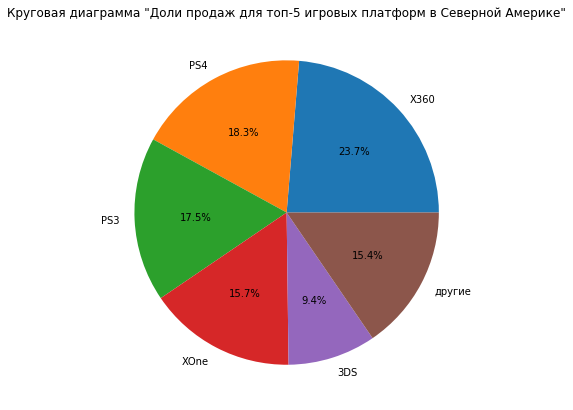

In [51]:
values = top5_platforms_na['na_sales']
labels = top5_platforms_na['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 игровых платформ в Северной Америке"')
plt.show()

Почти четверть всех продаж игр - 23,7% - в Северной Америке приходится на платформу X360. Доли PS3 и PS4 назначительно отличаются друг от друга - 17.5% и 18.3% соответсвенно. Доля платформы 3DS составляет немногим меньше 10%. Доля продаж игр для платформы XOne - 15.7%, при этом эта доля практически равна доле продаж, приходящихся на все остальные платформы.

Выведем аналогичные таблицы и диаграмы для Европы (EU) и Японии (JP).

In [52]:
print('Топ-5 игровых платформ в Европе')
top5_platforms_eu = games_per_region[['platform', 'eu_sales']].sort_values(by='eu_sales', ascending=False).head(5)
new_row_eu = {'platform' : 'другие', 'eu_sales' : games_per_region['eu_sales'].sum() - top5_platforms_eu['eu_sales'].sum()}
top5_platforms_eu = top5_platforms_eu.append(new_row_eu, ignore_index=True)
top5_platforms_eu

Топ-5 игровых платформ в Европе


,platform,eu_sales
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83
5,другие,91.51


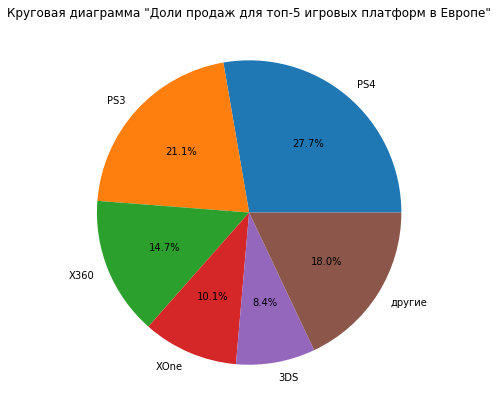

In [53]:
values = top5_platforms_eu['eu_sales']
labels = top5_platforms_eu['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 игровых платформ в Европе"')
plt.show()

В Европе в рейтинг топ-5 входят те же самые платформы, что и в Северной Америке, только положение и их доли тут другие. Почти половина всех продаж приходится на две платформы семейства PlayStation - PS4 и PS3, их доли составляют 27.7% и 21.1% соответственно. На третьем месте платформа X360 с долей в 14.7%, на четвёртом - XOne с долей в 10.1%. Последнее (пятое) место занимает платформа 3DS, доля продаж игр для которой составляет 8.4% от общего количества продаж. На долю остальных платформ приходится 18%.

In [54]:
print('Топ-5 игровых платформ в Японии')
top5_platforms_jp = games_per_region[['platform', 'jp_sales']].sort_values(by='jp_sales', ascending=False).head(5)
new_row_jp = {'platform' : 'другие', 'jp_sales' : games_per_region['jp_sales'].sum() - top5_platforms_jp['jp_sales'].sum()}
top5_platforms_jp = top5_platforms_jp.append(new_row_jp, ignore_index=True)
top5_platforms_jp

Топ-5 игровых платформ в Японии


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,другие,19.73


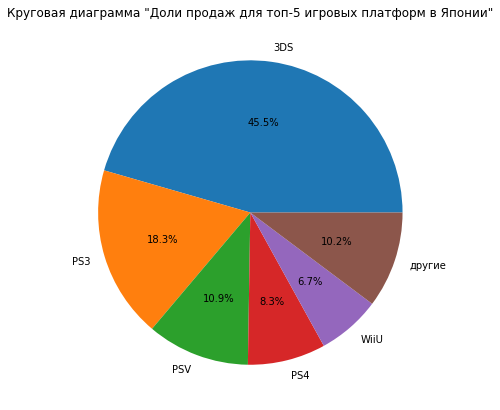

In [55]:
values = top5_platforms_jp['jp_sales']
labels = top5_platforms_jp['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 игровых платформ в Японии"')
plt.show()

В Японии большой популярностью пользуется платформа 3DS, на долю продаж игр для неё приходится целых 45.5% - практически половина! Второе, третье и четвёртое место занимает семейство PlayStation - PS3, PSV и PS4 соответственно - они имеют доли в 18.3%, 10.9% и 8.3%. На пятом месте - платформа WiiU с 6.7%. На долю других платформ приходится 10.2% продаж.

<br>

**Самые популярные жанры по регионам**

Теперь сгруппируем данные по жанрам и посчитаем общие продажи по каждому региону. Данные возьмём за актуальный период.

In [56]:
games_per_region_genre = games[games['year_of_release'] > 2011].groupby(['genre']).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']}).reset_index()
games_per_region_genre.columns = list(games_per_region_genre.columns)
games_per_region_genre.columns

Index([('genre', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Переименование столбцов:

In [57]:
games_per_region_genre.rename(columns={('genre', ''): 'genre', ('na_sales', 'sum'): 'na_sales', ('eu_sales', 'sum'): 'eu_sales', ('jp_sales', 'sum'): 'jp_sales'}, inplace=True)

Выведем на экран топ-5 жанров для Северной Америки (регион NA):

In [58]:
print('Топ-5 жанров игр в Северной Америке')
top5_genres_na = games_per_region_genre[['genre', 'na_sales']].sort_values(by='na_sales', ascending=False).head(5)
new_row_na = {'genre' : 'другие', 'na_sales' : games_per_region_genre['na_sales'].sum() - top5_genres_na['na_sales'].sum()}
top5_genres_na = top5_genres_na.append(new_row_na, ignore_index=True)
top5_genres_na

Топ-5 жанров игр в Северной Америке


,genre,na_sales
0,Action,180.15
1,Shooter,144.79
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,другие,84.64


Построим круговую диаграмму по долям продаж игр для платформ из топ-5, остальные платформы выделим в отдельный сектор "другие".

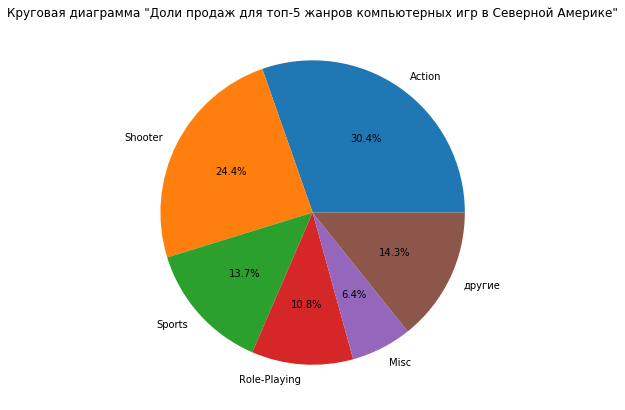

In [59]:
values = top5_genres_na['na_sales']
labels = top5_genres_na['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 жанров компьютерных игр в Северной Америке"')
plt.show()

Самым популярным жанром в Северной Америке является Action. Его доля составляет 30.4% от всех проданных игр. С небольшим отрывом в несколько процентов идёт жанр Shooter с долей в 24.4%. На третьем месте жанр Sports, на долю его продаж приходится 13.7%. Предпоследний жанр в рейтинге топ-5 - Role-Playing с долей в 10.8%. Пятое место у жанра Misc - 6.4%. На долю других жанров приходится 14.3%.

Выведем аналогичные сводные таблицы и круговые диаграммы для двух других регионов.

In [60]:
print('Топ-5 жанров игр в Европе')
top5_genres_eu = games_per_region_genre[['genre', 'eu_sales']].sort_values(by='eu_sales', ascending=False).head(5)
new_row_eu = {'genre' : 'другие', 'eu_sales' : games_per_region_genre['eu_sales'].sum() - top5_genres_eu['eu_sales'].sum()}
top5_genres_eu = top5_genres_eu.append(new_row_eu, ignore_index=True)
top5_genres_eu

Топ-5 жанров игр в Европе


,genre,eu_sales
0,Action,161.70
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,другие,89.10


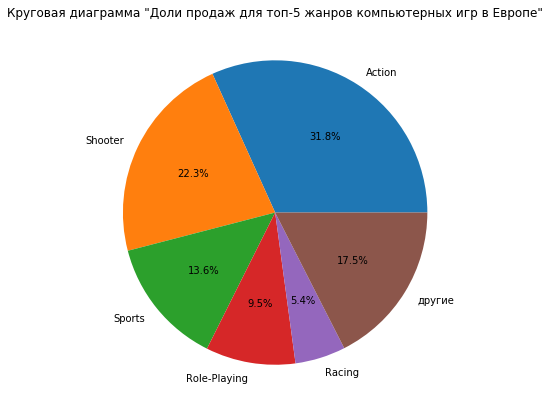

In [61]:
values = top5_genres_eu['eu_sales']
labels = top5_genres_eu['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 жанров компьютерных игр в Европе"')
plt.show()

Для Европы мы получили картину, очень похожую на ситуацию с жанрами в Северной Америке, и даже доли почти всех жанров приблизительно одинаковые. Но есть и отличие - здесь на последнем месте жанр Racing, его доля составляет 5.4%. Жанр Action, занимающий первое по популярности место в Северной Америке, в Европе даже немного популярнее, так как его доля немного больше - 31.8%. На жанр Shooter приходится почти четверть всех продаж - 22.3%. Доли Sports и Role-Playing составляют 13.6% и 9.5%, другие жанры занимают 17.5% от объёма продаж.

In [62]:
print('Топ-5 жанров игр в Японии')
top5_genres_jp = games_per_region_genre[['genre', 'jp_sales']].sort_values(by='jp_sales', ascending=False).head(5)
new_row_jp = {'genre' : 'другие', 'jp_sales' : games_per_region_genre['jp_sales'].sum() - top5_genres_jp['jp_sales'].sum()}
top5_genres_jp = top5_genres_jp.append(new_row_jp, ignore_index=True)
top5_genres_jp

Топ-5 жанров игр в Японии


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44
5,другие,41.63


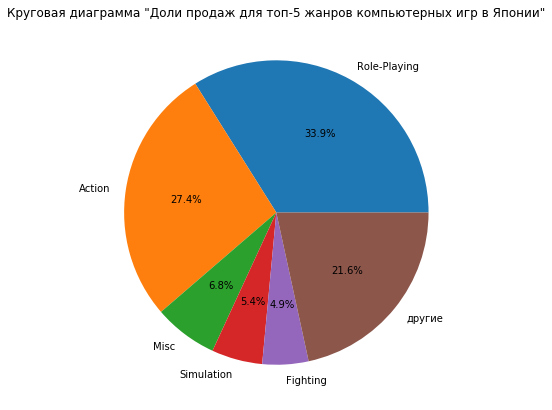

In [63]:
values = top5_genres_jp['jp_sales']
labels = top5_genres_jp['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма "Доли продаж для топ-5 жанров компьютерных игр в Японии"')
plt.show()

В Японии несколько другие предпочтения: самую большую долю продаж в 33.9% имеет жанр Role-Playing, за ним в рейтинге стоит жанр Action с долей 27.4%. Третье, четвёртое и пятое место занимают Misc, Simulation и Fighting - они составляют небольшие доли в 6.8%, 5.4% и 4.9% соответственно. Третий по величине сектор на круговой диаграмме занимают другие, не вошедшие в рейтинг топ-5 жанры, на долю которых приходится 21.6% проданных игр.

<br>

**Влияние рейтинга ESRB на продажи**

Изучим, влияет ли рейтинг ESRB на продажи в каждом из рассматриваемых регионов. Сгруппируем данные по рейтингу (столбец `'rating'`) и посчитаем общие продажи по каждому региону. Данные возьмём за актуальный период и исключим из выборки игры с отсутствующим рейтингом (значение `'RP'`).

In [64]:
games_per_rating = games[(games['year_of_release'] > 2011) & (games['rating'] != 'RP')].groupby(['rating']).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']}).reset_index()
games_per_rating.columns = list(games_per_rating.columns)
games_per_rating.columns

Index([('rating', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Переименование столбцов:

In [65]:
games_per_rating.rename(columns={('rating', ''): 'rating', ('na_sales', 'sum'): 'na_sales', ('eu_sales', 'sum'): 'eu_sales', ('jp_sales', 'sum'): 'jp_sales'}, inplace=True)

Построим график зависимости продаж от рейтинга игры для региона Северная Америка:

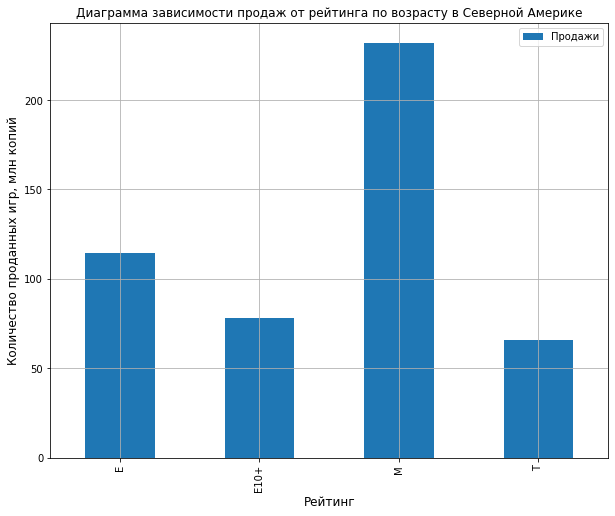

In [66]:
ax = games_per_rating.plot(x='rating', y='na_sales', kind='bar', figsize=(10, 8), grid=True, label='Продажи')
ax.set_title('Диаграмма зависимости продаж от рейтинга по возрасту в Северной Америке')
ax.set_xlabel('Рейтинг', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

Прежде чем делать выводы, напомним расшифровку рейтингов:

- E - для возраста от 6 лет;
- E10+ - для возраста от 10 лет;
- T - для возраста от 13 лет;
- M - для возраста от 17 лет.

Как видно из диаграммы, в Северной Америке самое большое количество проданных игр имеет маркировку рейтинка M, т.е предназначено для людей от 17 лет и старше. Таких игр за последние 5 лет было продано более 200 млн копий. Приблизительно в 2 раза меньше было продано игр для возраста от 6 лет (маркировка Е) - чуть больше 100 млн копий. Игр с маркировкой Е10+ и Т было продано примерно 80 и 70 млн копий соответственно. 

Построим график зависимости продаж от рейтинга игры для Европы:

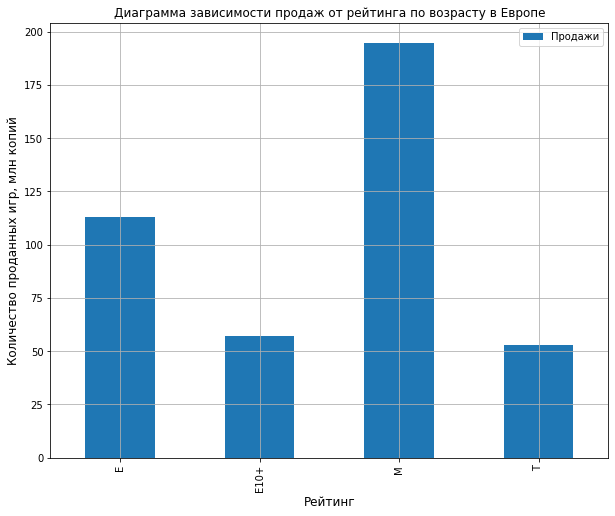

In [67]:
ax = games_per_rating.plot(x='rating', y='eu_sales', kind='bar', figsize=(10, 8), grid=True, label='Продажи')
ax.set_title('Диаграмма зависимости продаж от рейтинга по возрасту в Европе')
ax.set_xlabel('Рейтинг', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

В Европе также лидируют продажи игр для людей старше 17 лет. На втором месте, также как и в Северной Америке, игры для людей старше 6 лет. А вот количество проданных игр в каждой из групп - для людей старше 10 и 13 лет (маркировки Е10+ и Т) - примерно одинаковы и в 2 раза ниже, чем игр со знаком Е.

Построим график зависимости продаж от рейтинга игры для Японии:

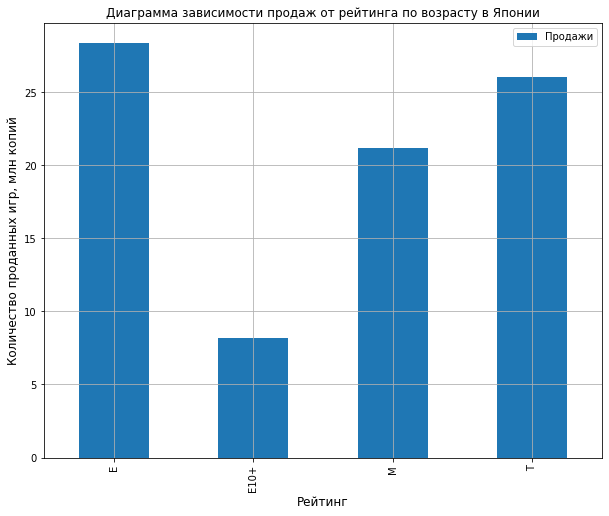

In [68]:
ax = games_per_rating.plot(x='rating', y='jp_sales', kind='bar', figsize=(10, 8), grid=True, label='Продажи')
ax.set_title('Диаграмма зависимости продаж от рейтинга по возрасту в Японии')
ax.set_xlabel('Рейтинг', fontsize = 12)
ax.set_ylabel('Количество проданных игр, млн копий', fontsize = 12)
plt.show()

В Японии наибольшее количество проданных игр предназначено для людей старше 6 лет (Е). Немного уступают в продажах игры со значком Т, примерно на 25% меньше продаются игры с маркировкой М, а наименьшее количество продаж у рейтинга Е10+.

**Вывод по шагу 4**

В итоге у нас получилась следующие портреты пользователей по регионам:

- Пользователи из Северной Америки с большой долей вероятности играют на платформах X360, PS4, PS3, XOne, 3DS. Игры они предпочитают таких жанров, как Action, Shooter, Sports, Role-Playing, Misc. Наибольшим спросом пользуются возрастные рейтинги M, E, E10+, T, причём самая большая доля рынка приходится на рейтинг М;
- Для европейского пользователя очень похожие характеристики: тут преобладают те же игровые платформы, но в несколько другой последовательности (PS4, PS3, X360, XOne, 3DS, где первая платформа - самая популярная, и далее по убыванию). Самые распространённые игровые жанры в Европе - Action, Shooter, Sports, Role-Playing, Racing. Наиболее востребованными являются игры с рейтингами M, E, E10+, T, где М также является преобладающим;
- В Японии пользователи предпочитают в большей мере игровые платформы японских производителей - в топе рейтинга 3DS с львиной долей продаж, затем идут платформы PS3, PSV, PS4, WiiU. Наиболее популярные игровые жанры среди японских пользователей - Role-Playing, Action, Misc, Simulation, Fighting. Распределение игр по возрастным рейтингам тут совсем другое, нежели в Северной Америке и Европе: примерно одинаковые позиции занимают возрастные рейтинги Е и Т, чуть меньше продаж у М, и самая маленькая доля у Е10+.

## Проверка гипотез

**Гипотеза о средних рейтингах пользователей платформ Xbox One и PC**

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Начнём с формулировки нулевой гипотезы. Поскольку нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, то в нашем случае она будет звучать так:

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*,

а альтернативную гипотезу для такой нулевой гипотезы сформулируем как:

*Средние пользовательские рейтинги платформ Xbox One и PC различаются*.

Так как мы проверяем равенство средних двух независимых генеральных совокупностей по их выборкам, то для проверки гипотезы используем метод `.ttest_ind()` из библиотеки `scipy`.

Чтобы правильно провести расчёты, сначала построим распределения пользовательских оценок для платформ Xbox One и PC, а затем посчитаем дисперсии по этим выборкам.

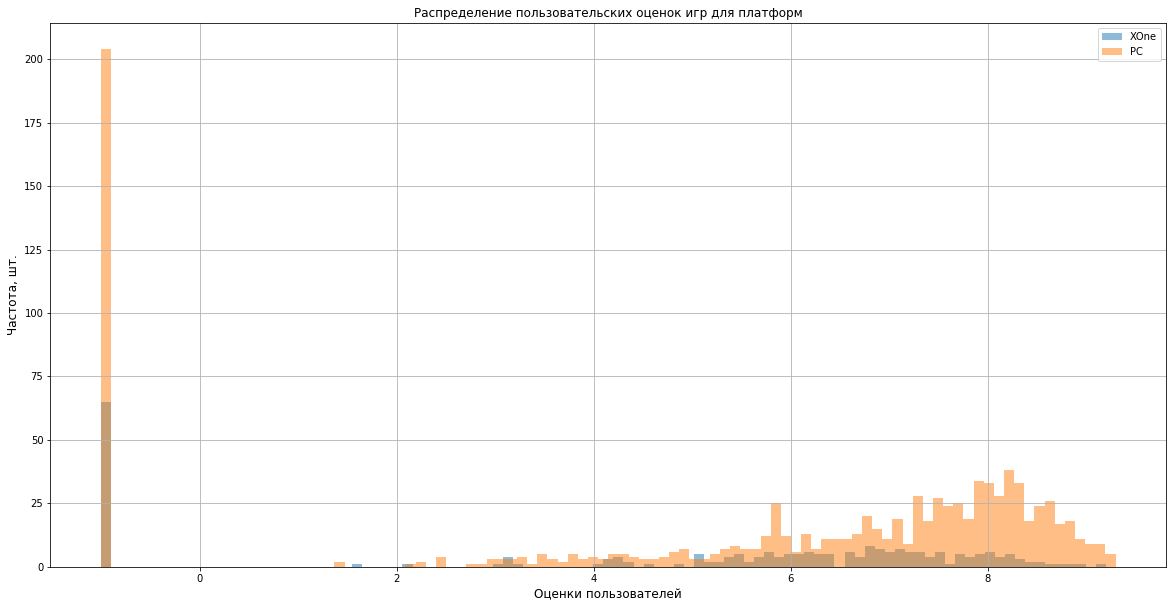

In [69]:
ax1 = games[games['platform'] == 'XOne']['user_score'].plot(kind = 'hist', figsize = (20, 10), alpha=0.5, grid=True, bins=100, label='XOne')
ax2 = games[games['platform'] == 'PC']['user_score'].plot(kind = 'hist', figsize = (20, 10), grid=True, alpha=0.5, bins=100, label='PC')
ax1.set_title('Распределение пользовательских оценок игр для платформ')
ax1.set_xlabel('Оценки пользователей', fontsize = 12)
ax1.set_ylabel('Частота, шт.', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Глядя на получившиеся распределения, сразу можно сделать вывод, что у нас есть выбросы на значении `-1`, появившиеся в результате выбора маркера для заполнения пустых значений. Он может негативно повлиять на дальнейшие результаты, поэтому при подсчёте дисперсий и проверке гипотез необходимо исключить это значение из выборки.

Посчитаем дисперсии:

In [70]:
print('Дисперсия по выборке пользовательского рейтинга платформы Xbox One:', np.var(games[(games['platform'] == 'XOne') & (games['user_score'] != -1)]['user_score'], ddof=1))
print('Дисперсия по выборке пользовательского рейтинга платформы PC:', np.var(games[(games['platform'] == 'PC') & (games['user_score'] != -1)]['user_score'], ddof=1))

Дисперсия по выборке пользовательского рейтинга платформы Xbox One: 1.9069968429360695
Дисперсия по выборке пользовательского рейтинга платформы PC: 2.334881141316405


Дисперсии разнятся, так что при проверке гипотезы установим `equal_var = False`. Перейдём к проверке гипотез. Критический уровень статистической значимости установим 5%.

In [71]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(games[(games['platform'] == 'XOne') & (games['user_score'] != -1)]['user_score'], games[(games['platform'] == 'PC') & (games['user_score'] != -1)]['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.101854214173904e-06
Отвергаем нулевую гипотезу


Видим, что pvalue получился очень близким к нулю, и мы отвергаем нулевую гипотезу. Значит, мы не отвергаем альтернативную гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

<br><br>

**Гипотеза о средних рейтингах пользователей жанров Action и Sports**

Теперь проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Построим распределения и посчитаем дисперсии по этим выборкам.

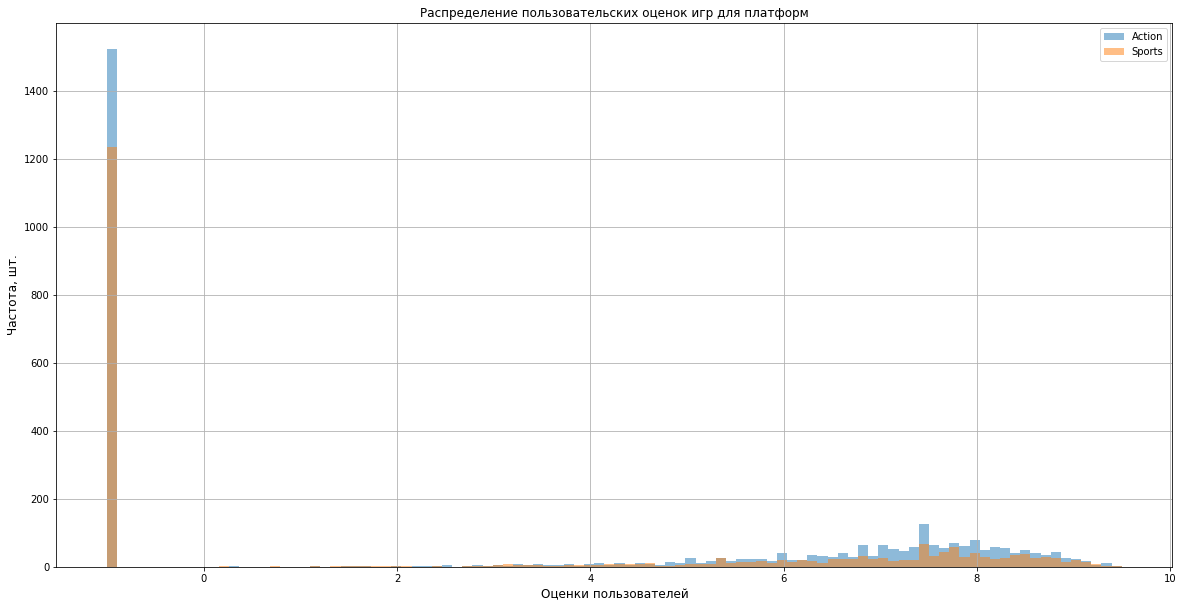

In [72]:
ax1 = games[games['genre'] == 'Action']['user_score'].plot(kind = 'hist', figsize = (20, 10), alpha=0.5, grid=True, bins=100, label='Action')
ax2 = games[games['genre'] == 'Sports']['user_score'].plot(kind = 'hist', figsize = (20, 10), grid=True, alpha=0.5, bins=100, label='Sports')
ax1.set_title('Распределение пользовательских оценок игр для платформ')
ax1.set_xlabel('Оценки пользователей', fontsize = 12)
ax1.set_ylabel('Частота, шт.', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Снова видим выбросы на значении `-1`. Исключим их из выборок при подсчёте дисперсий и проверке гипотез.
Выведем на экран дисперсии:

In [73]:
print('Дисперсия по выборке пользовательского рейтинга жанра Action:', np.var(games[(games['genre'] == 'Action') & (games['user_score'] != -1)]['user_score'], ddof=1))
print('Дисперсия по выборке пользовательского рейтинга жанра Sports:', np.var(games[(games['genre'] == 'Sports') & (games['user_score'] != -1)]['user_score'], ddof=1))

Дисперсия по выборке пользовательского рейтинга жанра Action: 2.024746286149255
Дисперсия по выборке пользовательского рейтинга жанра Sports: 2.60124008514694


Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза: *Средние пользовательские рейтинги жанров Action и Sports одинаковые*;
- Альтернативная гипотеза: *Средние пользовательские рейтинги жанров Action и Sports разные*.

Снова применим метод `.ttest_ind()` к выборкам игр жанров Action и Sports. Учитывая то, что дисперсии не равны, передадим в метод `equal_var = False`. Установим критический уровень статистической значимости `alpha` равным 5%.

In [74]:
alpha = 0.05

results = st.ttest_ind(games[(games['genre'] == 'Action') & (games['user_score'] != -1)]['user_score'], games[(games['genre'] == 'Sports') & (games['user_score'] != -1)]['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.08991887133875968
Не получилось отвергнуть нулевую гипотезу


Видим, что pvalue получился больше критического уровня статистической значимости, и мы не отвергаем нулевую гипотезу. Значит, отвергаем альтернативную, что средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод по шагу 5**

Проверка показала, что гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные" отвергаются.

## Общий вывод

Проведя анализ на основании датасета, полученного из открытых источников, в котором представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, мы выяснили, что срок жизни игровой платформы в среднем составляет 10 лет - за этот период появляются и исчезают новые платформы, а отдельно взятая платформа проходит полный цикл *рост-максимум-спад*. Для планирования продаж на будущий год нам важно наблюдать не весь цикл жизни платформ, а только тенденции, поэтому был выбран пятилетний период актуальности - в нашем случае 2012-2016 гг. Исследуя данные за последние 5 лет, мы выявили следующие закономерности:

- Потенциально прибыльные платформы - PlayStation4 и XBox One;
- При принятии решения о покупке игры потребитель намного больше доверяет оценкам критиков, чем оценкам пользователей. Более того, связи между оценками пользователей и продажами не выявлено;
- Самыми прибыльными являются следующие игровые жанры: Shooter, Sports, Platform, Role-Playing и Racing, а самыми плохо продаваемыми - Puzzle, Strategy и Adventure.

Также нам удалось узнать предпочтения пользователей из трёх крупнейших регионов потребления - Северной Америки, Европы и Японии, и прийти к пониманию, что пользователи из Северной Америки и Европы во многом, что касается потребительских привычек в игровом секторе, похожи, а вот пользователи из Японии во многом отличаются от североамериканцев и европейцев. Вот такие портреты пользователей получились:

- В Северной Америке в топ-5 самых популярных платформ входят X360, PS4, PS3, XOne, 3DS (здесь и далее названия перечисляются в порядке убывания от более популярного к менее популярному). Топ-5 популярных игровых жанров выглядит так: Action, Shooter, Sports, Role-Playing, Misc. Самым большим спросом в регионе пользуются игры для людей старше 17 лет (М), игры для возраста старше 6 лет (Е) продаются уже в 2 раза реже. А продажи игр для возрастов от 10 (Е10+) и от 13 лет (Т) составляют примерно треть от продаж игр рейтинга М.
- В Европе рейтинг популярности топ-5 платформ получился таким: PS4, PS3, X360, XOne, 3DS, а рейтинг популярности топ-5 жанров - Action, Shooter, Sports, Role-Playing, Racing. Распределение продаж по возрастным рейтингам аналогично североамериканскому.
- В Японии видно явное предпочтение игровых платформ японских производителей. В топ-5 здесь входят: 3DS, PS3, PSV, PS4, WiiU. Наиболее популярные игровые жанры среди японских пользователей - Role-Playing, Action, Misc, Simulation, Fighting. Влияние возрастных рейтингов на продажи в Японии такие: больше всего покупают игры для возраста от 6 (Е) и от 13 лет (Т), немного меньше берут игры для возраста от 17 лет (М), и примерно в 3 раза меньшие продажи по сравнению с рейтингом Т показывают игры для людей старше 10 лет (Е10+).

Также была проведена проверка двух гипотез: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные", в результате которой мы отвергли обе гипотезы.